# interpolation tests

## import packages, functions

In [1]:
%matplotlib inline

#traditional import method 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('xtick', labelsize = 18)                  #use 18 point font for numbering on x axis
mpl.rc('ytick', labelsize = 18)                  #use 18 point font for numbering on y axis

In [2]:
import numpy as np # if you use this, 'numpy' is replaced with the abbreviation 'np'

In [3]:
# from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline

## import and graph data

In [4]:
file_name = 'Calibration_650nm_result.csv'        # replace with the name of your csv data file

file_folder = ''                                 # use this if your data file is in the same folder as your python program

#file_folder = '/Users/nfortune/data/'             # use this if data file is in a folder called 'data' 
                                                  # inside the folder 'nfortune' within the 'Users' directory 
                                                  # such as when using the Jupyter webserver jove.smith.edu
                                                  # this is called 'absolute addressing'

#file_folder = 'data_subfolder/'                  # you can use this if data file is in a _subfolder_ called 'data_subfolder'
                                                  # this is called 'relative addressing'
data_file = file_folder + file_name

angle, V_pd, data_uncertainty  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2), unpack = True)

In [5]:
new_file_name = 'Calibration_650nm_fit.csv'         

#file_folder = ''                           # use this if your data file is in the same folder as your python program
file_folder = '/Users/nfortune/data/'            


new_data_file = file_folder + new_file_name

angle_fit, V_pd_fit = np.loadtxt(new_data_file, delimiter = ',', skiprows = 1, usecols = (0, 1), unpack = True)

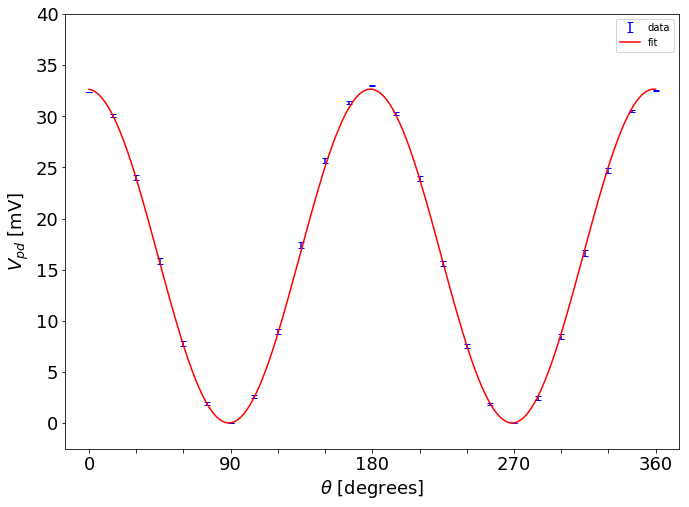

In [6]:
plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
                                             #for default size, type plt.figure() 
                                             
plt.xlabel(r"$\theta$ [degrees]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_{pd}$ [mV]", fontsize = 18)   #use 18 point font for label text

# plot the data as before in blue
plt.errorbar(angle, V_pd,  
    xerr=None, yerr=data_uncertainty, 
    linestyle = 'none', 
    color = 'blue',  
    capsize = 3, capthick = 1, label = "data")


#plot the curve fit in red
plt.errorbar(angle_fit, V_pd_fit, xerr = None, yerr = None, color = 'red', label = 'fit' )
plt.xlim(-15, 375)
plt.ylim(-2.5, 40)
plt.xticks([0,   30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360], 
           ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.legend(loc = 'best')
    
plt.show()  

## interpolate data

### interp1d
Perhaps the most commonly used interpolation function is scipy.interpolate.interp1d 

In [7]:
interpolating_function = interp1d(angle, V_pd, kind = 'cubic')

In [8]:
interpolated_data = interpolating_function(angle_fit)

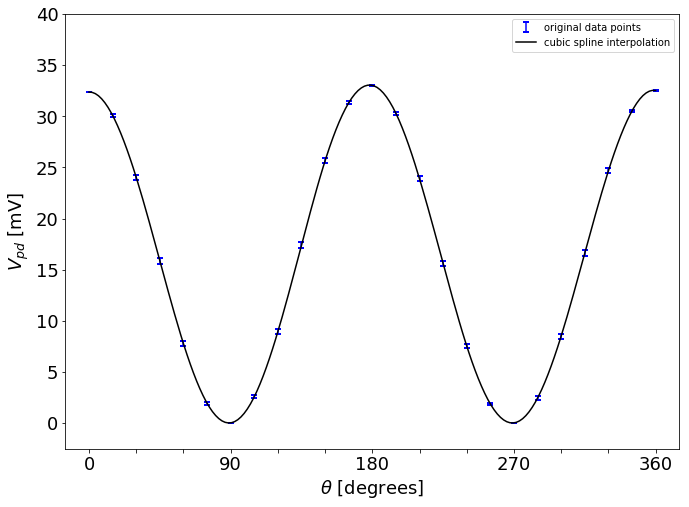

In [9]:
plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
                                             #for default size, type plt.figure() 
                                             
plt.xlabel(r"$\theta$ [degrees]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_{pd}$ [mV]", fontsize = 18)   #use 18 point font for label text




#plt.errorbar(angle_fit, V_pd_fit, xerr = None, yerr = None, color = 'red', label = 'fit to physical model' )
plt.errorbar(angle, V_pd,  
    xerr=None, yerr=data_uncertainty, 
    linestyle = 'none', 
    color = 'blue',  
    capsize = 3, capthick = 2, label = "original data points")

plt.errorbar(angle_fit, interpolated_data, xerr = None, yerr = None, color = 'black', label = 'cubic spline interpolation')


plt.xlim(-15, 375)
plt.ylim(-2.5, 40)
plt.xticks([0,   30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360], 
           ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.legend(loc = 'best')
    
plt.show() 

### InterpolatedUnivariateSpline

Two advantages of the UnivariateSpline function are 
- it allows the calculation of derivatives for any order spline fit
- it allow for calculations of roots (zero crossings) for 3rd order (cubic) splines.

Let's interpolate the data using a 4th order spline, find the derivative, then find the zero crossings of the derivative. These should correspond to the extrema of the original data. 

In [25]:
InterpolatingUnivariateSpline_function = InterpolatedUnivariateSpline( angle, V_pd, k = 4)

In [26]:
IUS_interpolated_data = InterpolatingUnivariateSpline_function(angle_fit)

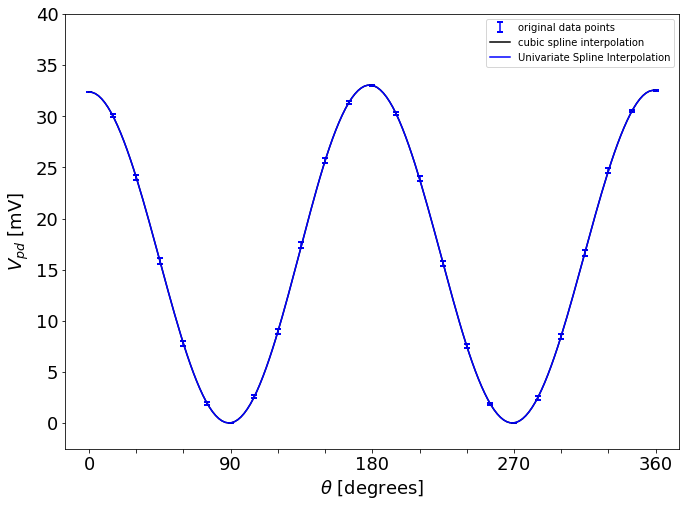

In [28]:
plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
                                             #for default size, type plt.figure() 
                                             
plt.xlabel(r"$\theta$ [degrees]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_{pd}$ [mV]", fontsize = 18)   #use 18 point font for label text




#plt.errorbar(angle_fit, V_pd_fit, xerr = None, yerr = None, color = 'red', label = 'fit to physical model' )
plt.errorbar(angle, V_pd,  
    xerr=None, yerr=data_uncertainty, 
    linestyle = 'none', 
    color = 'blue',  
    capsize = 3, capthick = 2, label = "original data points")

plt.errorbar(angle_fit, interpolated_data, xerr = None, yerr = None, color = 'black', label = 'cubic spline interpolation')


plt.errorbar(angle_fit, interpolated_data, xerr = None, yerr = None, color = 'blue', label = 'Univariate Spline Interpolation')


plt.xlim(-15, 375)
plt.ylim(-2.5, 40)
plt.xticks([0,   30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360], 
           ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.legend(loc = 'best')
    
plt.show() 

In [86]:
spline_derivative_function = InterpolatingUnivariateSpline_function.derivative()

data_derivative = spline_derivative_function(angle_fit)
zero_crossings = InterpolatingUnivariateSpline_function.derivative().roots()
zero_values = np.zeros(len(zero_crossings))
extrema_values = InterpolatingUnivariateSpline_function(zero_crossings)

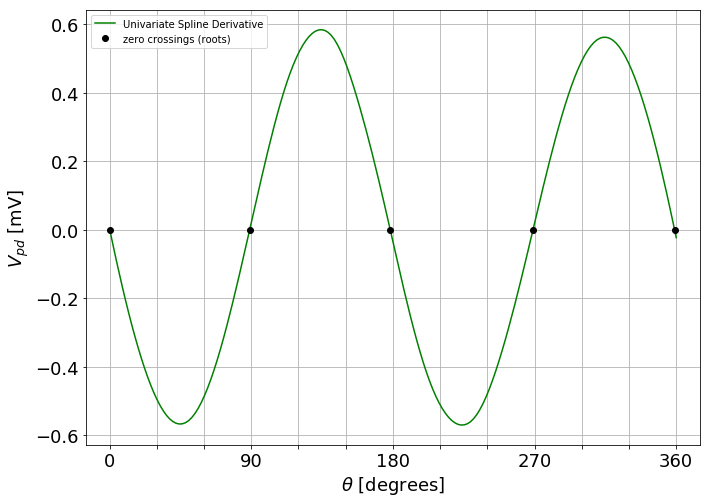

In [89]:
plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
                                             #for default size, type plt.figure() 
                                             
plt.xlabel(r"$\theta$ [degrees]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_{pd}$ [mV]", fontsize = 18)   #use 18 point font for label text

# plt.errorbar(angle_fit, interpolated_data, xerr = None, yerr = None, color = 'blue', label = 'Univariate Spline Interpolation')
plt.errorbar(angle_fit, data_derivative, xerr = None, yerr = None, color = 'green', label = 'Univariate Spline Derivative')
plt.errorbar(zero_crossings, zero_values, xerr = None, yerr = None, fmt = 'o', color = 'black', label = 'zero crossings (roots)')


plt.xlim(-15, 375)
#plt.ylim(-10, 40)
plt.xticks([0,   30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360], 
           ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.legend(loc = 'best')
plt.grid(True)
plt.show() 

In [54]:
peak_value = V_pd.max()
print(peak_value)

33.0189


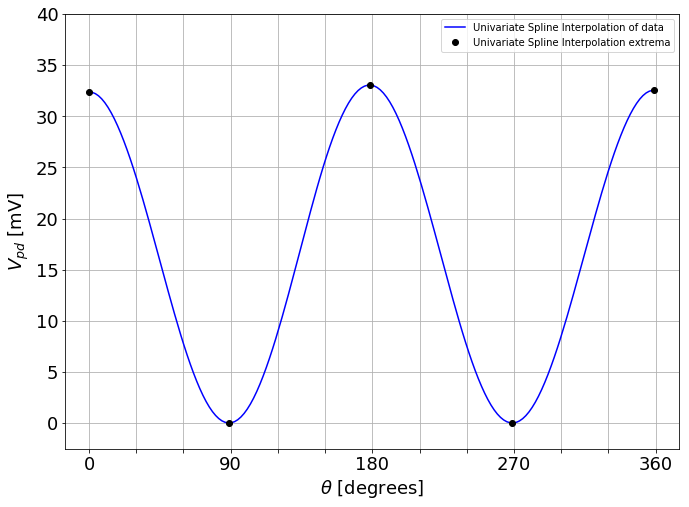

In [93]:
plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
                                             #for default size, type plt.figure() 
                                             
plt.xlabel(r"$\theta$ [degrees]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_{pd}$ [mV]", fontsize = 18)   #use 18 point font for label text

plt.errorbar(angle_fit, interpolated_data, xerr = None, yerr = None, color = 'blue', label = 'Univariate Spline Interpolation of data')


# plt.errorbar(zero_crossings, derivative_zeros, xerr = None, yerr = None, fmt = 'o', color = 'red', label = 'roots of derivative')
plt.errorbar(zero_crossings, extrema_values, xerr = None, yerr = None, fmt = 'o', color = 'black', label = 'Univariate Spline Interpolation extrema')
# plt.errorbar(angle_fit, peak_value * data_derivative, xerr = None, yerr = None, color = 'green', label = 'Univariate Spline Derivative ' + 'x $V_{pd}^{max}$ [mV/degree]')

plt.xlim(-15, 375)
plt.ylim(-2.5, 40)
plt.xticks([0,   30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360], 
           ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.legend(loc = 'best')
plt.grid(True)
plt.show() 